# AR6/WGI Chapter 8

# Build a figure showing change for a (plain or derived) variable, for three SSPs and two seasons

## S.Sénési - sept 2019 to march 2021

### A few commands below are specific to the Notebook environment, and have no effect in pure Python

## Default settings (some may be overriden by Papermill - this would show in next cell in the execution output notebook)

In [1]:
# Location of libraries
#######################
climaf_lib            = "/home/ssenesi/climaf_installs/climaf_running" 
CAMMAC                = "/home/ssenesi/CAMMAC"


figure_title           = None  # if None, an automatic title will be generated
auto_title_prefix      = "Seasonal"
#
figure_name            = "Fig8-19" # Used for a symbolic link to an explicit filename,and for metadata filename
# Version number will be a suffix for figure filename. Use e.g. "_V1" for legibility
version                = ""

#See doc for data_versions in sibling directory data_versions
data_versions_tag      = "20200719"
data_versions_dir      = "/home/ssenesi/CAMMAC/select_data_versions"
excluded_models        = []
included_models        = None # If a list is provided, only these models may be used
variability_models     = None
variability_excluded_models = []
variability_sampling_args={"house_keeping":True,"compute":True,"detrend":True,"shift":100,"nyears":20,"number":20}

#
variable               = "mrso"
threshold              = None 
table                  = "Lmon"
field_type             = "mean_schange" # Any type of field as documented in function CAMMAClib.changes.change_fields
derivation_label       = "plain"        # Can plot the change of the raw variable, or its variability, or ... see CAMMAClib.changes.derivations
custom_plot            = {"colors": "-5 -2 -1 -0.5 -0.25 0. 0.25 0.5 1 2 5", "units":"-", "color":"AR6_Precip_12s"}  # Should be tuned, usually
#
seasons                = ["DJF","JJA"]  # any CDO season, and/or "ANN". Figure is tuned for a pair of seasons
experiments            = ["ssp126","ssp245","ssp585"] # Figure is tuned for three experiments
proj_period            = "2081-2100"
ref_experiment         = "historical"
ref_period             = "1995-2014"  
#
# If pre-computed fields for these SSPs, seasons and projection_period are available, should we use it ?
# Set it to False for recomputing either :
#   - for printing fields and field changes statistics
#   - or if any external script launched by CliMAF was internally changed
use_cached_proj_fields = True   
print_statistics       = True

# If some basic fields are to be plotted for each model :

#   - which fields should be actually plotted
# plot_for_each_model    = [ "reference", "projection", "change", "rchange", "schange", "variability" ]
plot_for_each_model    = [ ]

#   - and with which common plot_parameters
custom_plot_all_fields = { "proj" : "Robinson", "mpCenterLonF" : 0., "options" : "lbBoxEndCapStyle=TriangleBothEnds", "focus":"land"}
all_models_page_args   = {"page_width":3675,"page_height":5188,"insert_width":2000,"pt":48, "ybox":133,"y":52}

#   - and which range should be used
ranges = {}   # The baseline value !
# Values below fit the case of mrso
#ranges={ "reference" : { "min" : 0., "max" : 3000. , "delta" : 200. } ,
#        "projection" : { "min" : 0., "max" : 3000. , "delta" : 200. } ,
#        "change"     : { "min" :1000.,"max":-1000. , "delta":200.} , 
#        "rchange"    : { "min" : -25., "max" : 25. , "delta" : 5. } ,
#        "schange"    : { "colors": "-5 -2 -1 -0.5 -0.25 0. 0.25 0.5 1 2 5"  , "units":"-", "color":"AR6_Precip_12s" } , 
#        "variability": { "min" : 0., "max" : 1. , "delta" : 0.1 } ,
#       }
#
outdir                 = "./figures"
cache_dir              = "./cache"
figure_details         = {"page_width":2450,"page_height":3444, "insert_width":1800,"pt":48, "ybox":133,"y":52}
common_grid            = "r360x180"
# Should we apply a mask to the figures (grid must fit with 'common_grid')
figure_mask            = None
#figure_mask            = CAMMAC+"/data/mask_hide_antarctic_360x180.nc"

do_test                = True

In [2]:
if do_test :
    version             = "_test"
    proj_period         = "2100"
    ref_period          = "2014" 
    included_models     = ["CNRM-CM6-1"]    
    seasons             = ["DJF","DJF"]  
    experiments         = ["ssp126","ssp126","ssp126"] 
    figure_mask="/home/ssenesi/CAMMAC/data/mask_hide_antarctic_360x180.nc"
    variability_sampling_args={"house_keeping":False,"compute":True,"detrend":True,"shift":100,"nyears":3,"number":3}

    #variability_sampling_args={}
    variability_models  = included_models
    #variability_excluded_models = []
    use_cached_proj_fields = False   


    #plot_for_each_model    = [ "reference", "projection", "change", "rchange", "schange", "variability" ]

## Load libraries

In [3]:
import sys

# Climaf settings
sys.path=[climaf_lib] + sys.path
from climaf.api import *
from climaf.cache import stamping
climaf.cache.stamping=False

# AR6 figures project packages
sys.path.append(CAMMAC) 
from CAMMAClib.changes    import AR6_change_figure_with_caching
from CAMMAClib.ancillary  import create_labelbar, prettier_label
from CAMMAClib.mips_et_al import TSU_metadata, read_versions_dictionnary

python => 2.7.15 | packaged by conda-forge | (default, Jul  2 2019, 00:39:44) 
[GCC 7.3.0]
---
Required softwares to run CliMAF => you are using the following versions/installations:
ncl 6.6.2 => /modfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/ncl
cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) "4.3.6" => /usr/bin/ncks
ncdump fichier => /prodigfs/ipslfs/dods/jservon/miniconda/envs/cesmep_env/bin/ncdump
Check stamping requirements
nco (ncatted) found -> /usr/bin/ncatted
convert found -> /usr/bin/convert
pdftk found -> /usr/bin/pdftk
exiv2 found -> /home/ssenesi/climaf_installs/climaf_running/bin/exiv2
---
CliMAF install => /home/ssenesi/climaf_installs/climaf_running


CliMAF version = 2.0.0
Cache directory set to : /data/ssenesi/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/ssenesi/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
No reachable lmdz_SE library
Available macros read from ~/.climaf.macros are : []


### If using a notebook, use wide display

In [4]:
from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
# Fix sign issue with some models for evspsbl
calias('CMIP6','evspsbl',scale=-1,conditions={"model":["CAMS-CSM1-0","EC-Earth3","EC-Earth3-Veg"]})

# Define P-E
derive('CMIP6', 'P-E','minus','pr','evspsbl')

climaf.driver.dig_hard_into_cache = False

## The basic engine is function AR6_change_figure_with_caching, which has numerous settings (use 'help(AR6_change_figure_with_caching)')

## Next function allows to set most values with global variables, the others with its arguments values

In [6]:
def afigure(experiment,season, title=None ,labelbar="False",outfile=None,threshold=threshold):
    fil,fig,dic,variab_models,used_models= AR6_change_figure_with_caching(variable,experiment,season,
        data_versions_tag=data_versions_tag, data_versions_dir=data_versions_dir,
        models=included_models, excluded_models=excluded_models,
        variability_models=variability_models, variability_excluded_models=variability_excluded_models,
        ref_period=ref_period, proj_period=proj_period, 
        table=table, ref_experiment=ref_experiment, 
        derivation_label=derivation_label, field_type=field_type,
        title=title, 
        custom_plot=custom_plot, labelbar=labelbar, 
        outdir=outdir, outfile=outfile,
        #
        common_grid=common_grid, mask=figure_mask,
        variab_sampling_args=variability_sampling_args,
        cache_dir=cache_dir, print_statistics=print_statistics,
        deep=None,  read=use_cached_proj_fields, write=True,
        threshold = threshold)
    csync()
    return fig,dic,variab_models,used_models

## Compute figures for the three experiments and two seasons

In [9]:
figs=dict()
dics=dict()
number=0
letters=["a","b","c","d","e","f"]
metadata=""
data_versions=read_versions_dictionnary(data_versions_tag, data_versions_dir)

if len(plot_for_each_model) > 0 :
    use_cached_proj_fields = False

for exp in experiments :
    figs[exp]=dict()
    dics[exp]=dict()
    for season in seasons:
        dics[exp][season]=dict()
        title="(%s) %s %s"%(letters[number],prettier_label[exp],season)
        #
        figs[exp][season],dic,variab_models,models = afigure(exp,season,title=title)
        #
        if not use_cached_proj_fields :
            dics[exp][season].update(dic[exp][season])
        metadata += TSU_metadata([ref_experiment,exp],models       ,variable,table,data_versions,letters[number])
        metadata += TSU_metadata(["piControl"]       ,variab_models,variable,table,data_versions,letters[number])
        #cdrop(figs[exp][season])
        number+=1

Values below are field means, except for last two columns. Last third is median and %. Last three columns are %
exp.  seas model                 variablity   reference   projection       change|rel/std   :mdn     max     p90
------------------------------------------------------------------------------------------------------------------------
Variabilities : CNRM-CM6-1    0.48 / 
ssp126 DJF CNRM-CM6-1                       0     1.7e+03      1.7e+03          -30        -0.058      70      5.8       3.4e+03 1.7e+07      1.2
ssp126 medians : change    -2.8 relative  -0.058 %

Figure available as  ./figures/fig_mrso_plain_ssp126_DJF_mean_schange_2014_2100_20200719_ac6b9a99.png
Values below are field means, except for last two columns. Last third is median and %. Last three columns are %
exp.  seas model                 variablity   reference   projection       change|rel/std   :mdn     max     p90
-------------------------------------------------------------------------------------------

## Write the metadata file

In [ ]:
import os.path
if not os.path.exists(outdir):
    os.makedirs(outdir)
with open("%s/%s%s_md"%(outdir,figure_name,version),"w") as f:
        f.write(metadata)

## Create the common labelbar and assemble it with plots

In [14]:
# create a figure wih labelbar (using same plot settings as for figures above)
labelbar_figure=afigure(experiments[0],seasons[0],labelbar="True",outfile="./fig_with_label.png")

# Call utility function for extracting labelbar and adding fill pattern for shadings
create_labelbar("./fig_with_label.png", "./insert.png",missing=False)

if figure_title is None :
    figure_title="%s %s for %s (%s vs %s)"%(auto_title_prefix,prettier_label[field_type],prettier_label[variable],proj_period,ref_period)

# Create multi-panel figure
page=cpage([
    [figs[experiments[0]][seasons[0]],figs[experiments[0]][seasons[1]]],
    [figs[experiments[1]][seasons[0]],figs[experiments[1]][seasons[1]]],
    [figs[experiments[2]][seasons[0]],figs[experiments[2]][seasons[1]]]],
    title=figure_title,
    insert="./insert.png",
    **figure_details
    )
#
outfile="%s_change_3SSPS_2seasons_%s_%s%s.png"%(variable,proj_period,data_versions_tag,version)
cfile(page,outdir+"/"+outfile)
os.system("cd %s ; ln -sf %s %s%s.png"%(outdir,outfile,figure_name,version))
#
small=outfile.replace(".png",".small.png")
os.system("cd %s ; convert -geometry 50%% %s %s"%(outdir,outfile,small))
os.system("cd %s ; ln -sf %s %s%s_small.png"%(outdir,small,figure_name,version))
#
os.system("rm ./insert.png")
os.system("rm ./fig_with_label.png")

mrso {}
Figure available as  ./fig_with_label.png


0

## If using a notebook , display result on-line

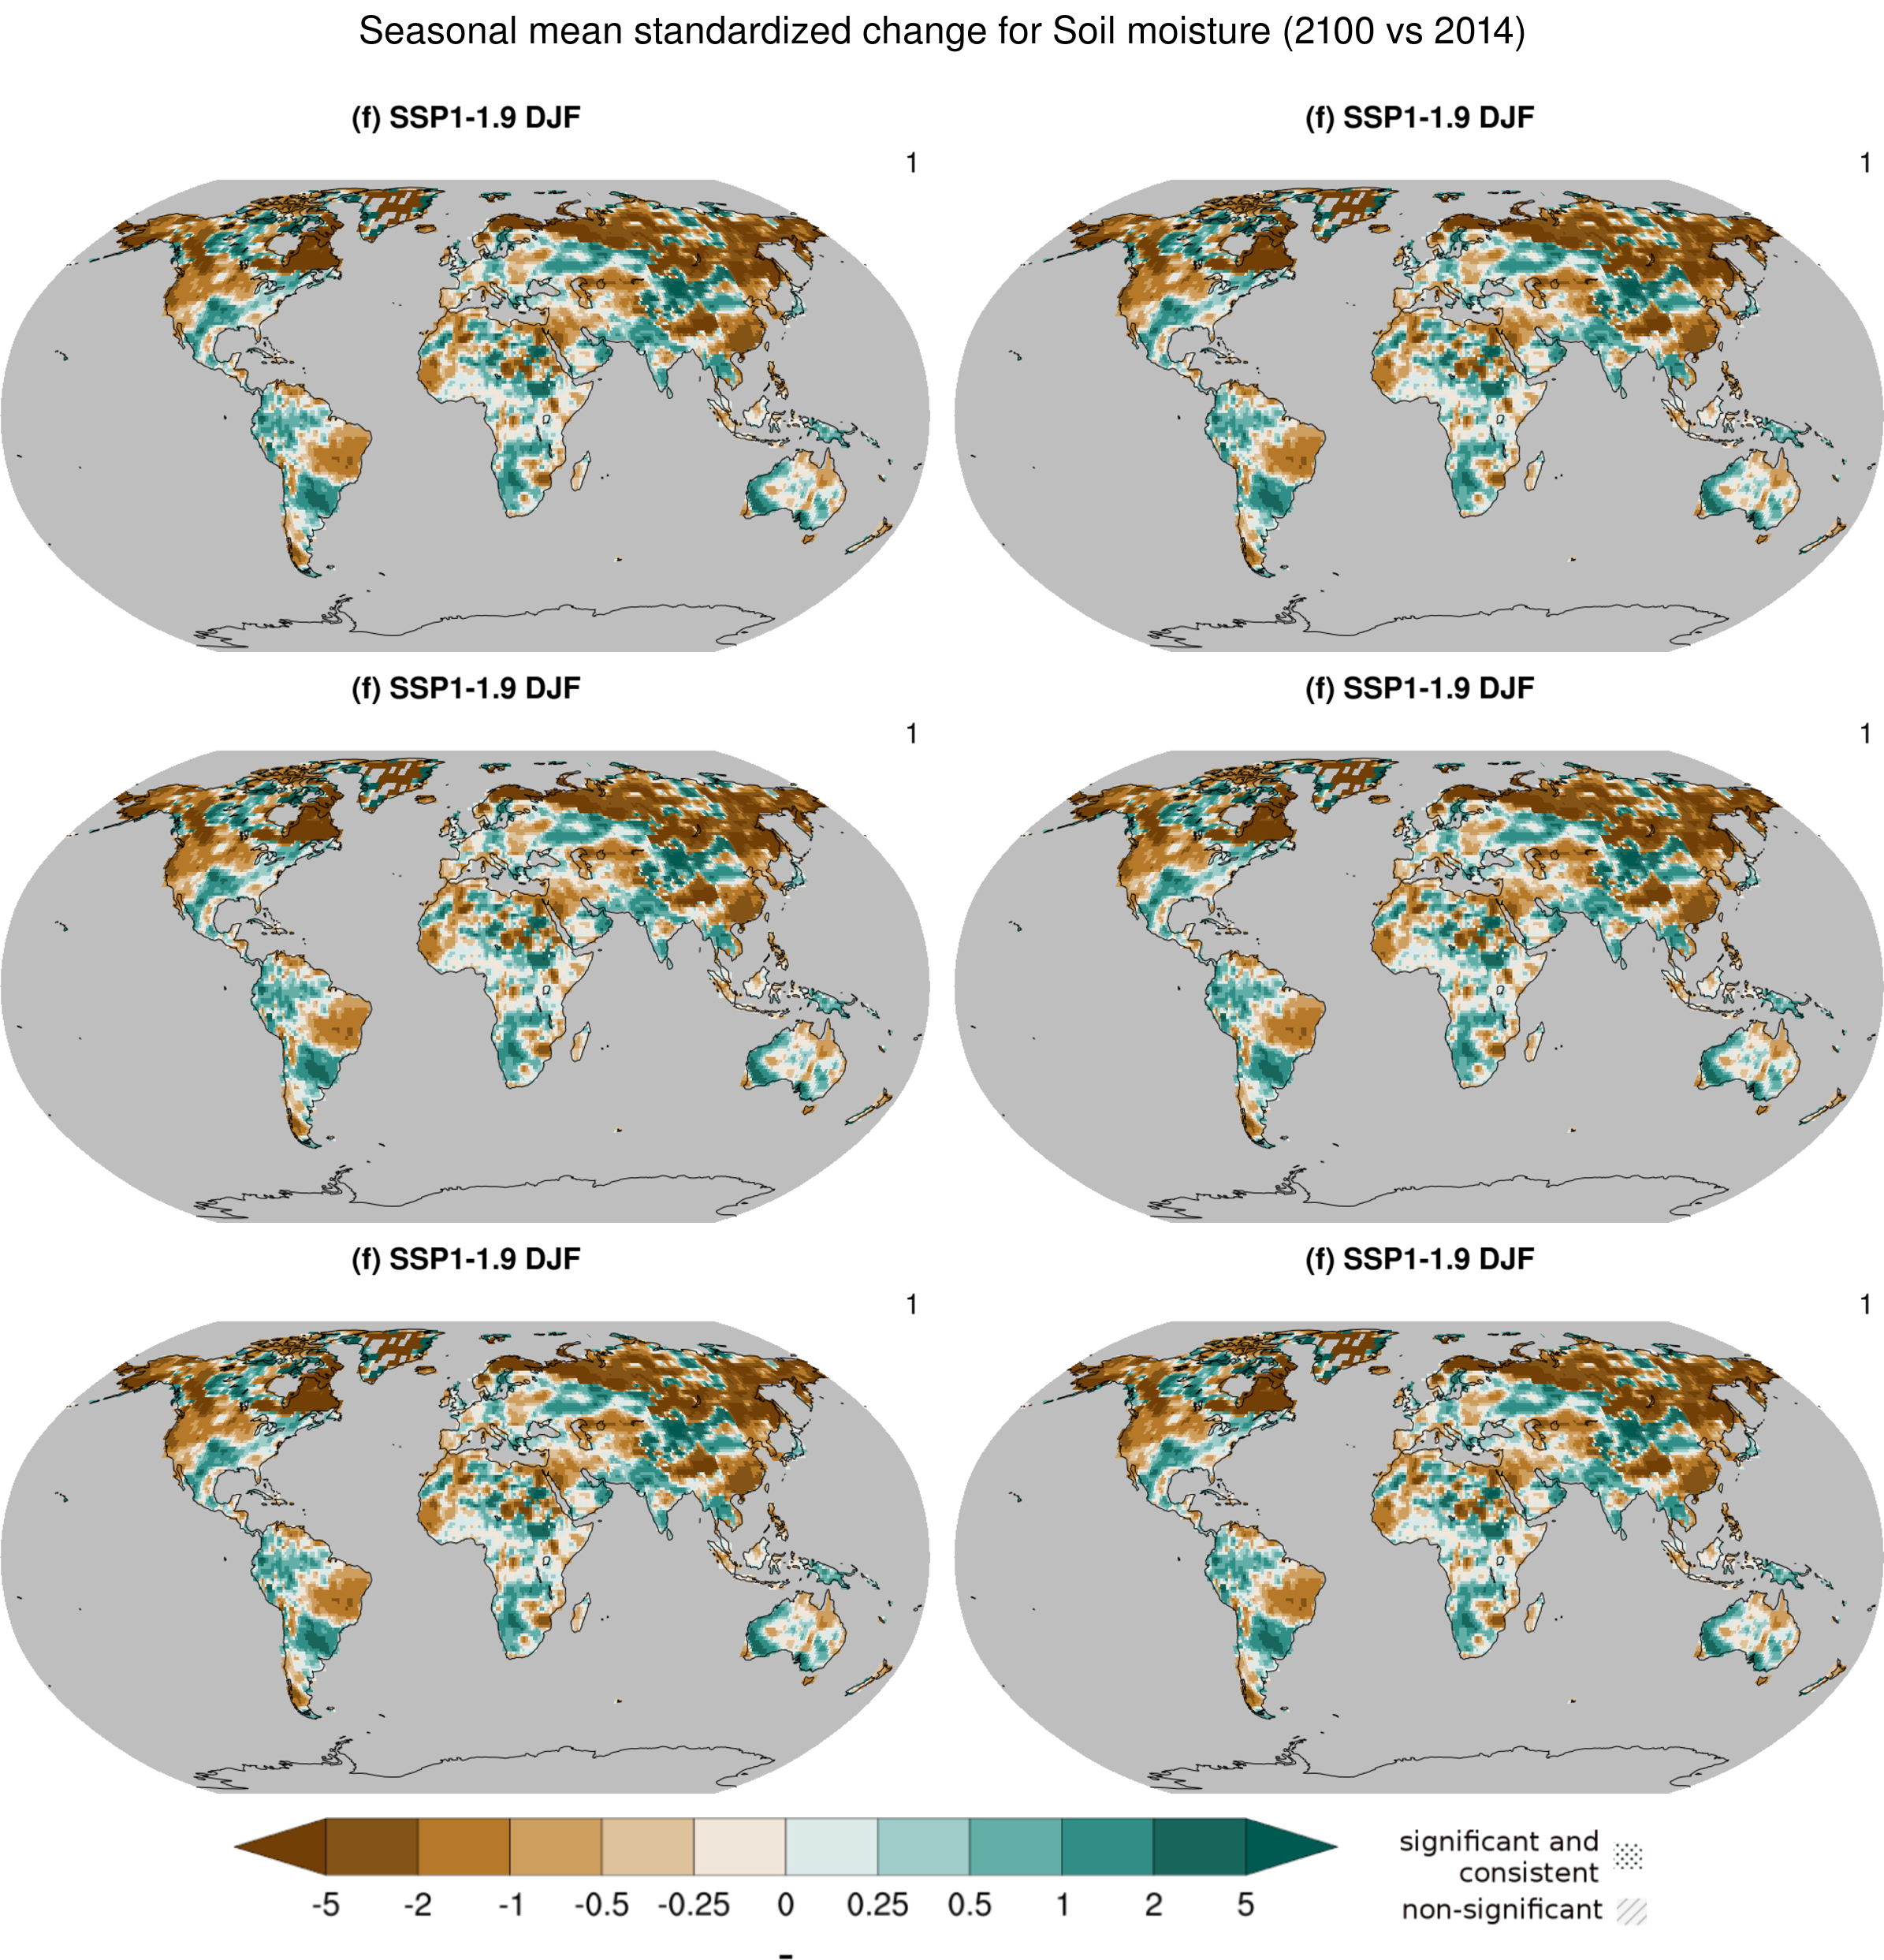

In [15]:
#Image(outdir+"/"+outfile,width=800)

dic[experiment][season][key][derivation_label][model] where key has values : reference, projection, change, rchange, schange, variability


## Plotting all models for all field types and all cases

In [ ]:
for field_type in plot_for_each_model :
    #
    plotargs=custom_plot_all_fields.copy()
    plotargs.update(ranges.get(field_type,{}))
    #
    for experiment in experiments : 
        for season in seasons :
            allplots=plot(cens(dics[experiment][season][field_type][derivation_label]),**plotargs)
            title=title="%s_%s_%s_%s_%s"%(variable,derivation_label,field_type,experiment,season)
            page=cpage(allplots,title=title,**all_models_page_args)
            cdrop(page)
            pagename="%s/all_models_%s_%s_%s_%s_%s_%s.png"%(outdir,variable,derivation_label,field_type,experiment,season,data_versions_tag)
            cfile(page,pagename)